In [1]:
from __future__ import annotations

from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    RocCurveDisplay,
    confusion_matrix,
    classification_report,
)

In [2]:
NOTEBOOK_DIR = Path.cwd()

candidate_paths = [
    NOTEBOOK_DIR / "S05-hw-dataset.csv",     
]

data_path = next((p for p in candidate_paths if p.exists()), None)
data_path

WindowsPath('C:/Users/Kirill/source/repos/aie-group/homeworks/HW05/S05-hw-dataset.csv')

In [3]:
assert data_path is not None, "Не найден S05-hw-dataset.csv. Проверь расположение файла и candidate_paths."
df = pd.read_csv(data_path)
df.shape, df.columns.tolist()[:10]

((3000, 17),
 ['client_id',
  'age',
  'income',
  'years_employed',
  'credit_score',
  'debt_to_income',
  'num_credit_cards',
  'num_late_payments',
  'has_mortgage',
  'has_car_loan'])

In [9]:
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [13]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
client_id,3000.0,1500.500000,866.169729,1.000000,750.750000,1500.500000,2250.250000,3000.000000
age,3000.0,45.059667,14.192883,21.000000,33.000000,45.000000,57.000000,69.000000
income,3000.0,69658.992000,24742.235182,15000.000000,52641.750000,69784.500000,85874.250000,156351.000000
years_employed,3000.0,19.577667,11.381497,0.000000,10.000000,20.000000,29.000000,39.000000
credit_score,3000.0,649.285333,69.955852,402.000000,604.000000,647.000000,697.000000,850.000000
debt_to_income,3000.0,0.284065,0.161112,0.006147,0.157796,0.261726,0.388886,0.878343
num_credit_cards,3000.0,3.494667,2.289917,0.000000,1.000000,3.000000,6.000000,7.000000
num_late_payments,3000.0,6.869333,4.291278,0.000000,3.000000,7.000000,10.000000,14.000000
has_mortgage,3000.0,0.495000,0.500058,0.000000,0.000000,0.000000,1.000000,1.000000
has_car_loan,3000.0,0.501333,0.500082,0.000000,0.000000,1.000000,1.000000,1.000000


In [15]:
target_col = "default"
df[target_col].value_counts()

default
0    1769
1    1231
Name: count, dtype: int64

In [17]:
df[target_col].value_counts(normalize=True).rename("share")

default
0    0.589667
1    0.410333
Name: share, dtype: float64

In [19]:
df.isna().mean().sort_values(ascending=False).head(10)

client_id                         0.0
has_car_loan                      0.0
customer_tenure_years             0.0
active_loans                      0.0
phone_calls_to_support_last_3m    0.0
region_risk_score                 0.0
checking_balance                  0.0
savings_balance                   0.0
has_mortgage                      0.0
age                               0.0
dtype: float64

In [21]:
id_col = "client_id"

X = df.drop(columns=[target_col, id_col], errors="ignore")
y = df[target_col].astype(int)

X.shape, y.shape, X.dtypes.value_counts()

((3000, 15),
 (3000,),
 int64      13
 float64     2
 Name: count, dtype: int64)

In [25]:
non_numeric = X.select_dtypes(exclude="number").columns.tolist()
non_numeric

[]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape, y_train.mean(), y_test.mean()

((2250, 15), (750, 15), 0.4102222222222222, 0.4106666666666667)

In [29]:
def evaluate_classifier(model, X_train, y_train, X_test, y_test, name: str):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    # ROC-AUC требует score/proba для класса 1
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    auc = roc_auc_score(y_test, y_score)

    return {
        "model": name,
        "accuracy": acc,
        "roc_auc": auc,
    }

dummy_mf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_str = DummyClassifier(strategy="stratified", random_state=42)

res_dummy_mf = evaluate_classifier(dummy_mf, X_train, y_train, X_test, y_test, "Dummy(most_frequent)")
res_dummy_str = evaluate_classifier(dummy_str, X_train, y_train, X_test, y_test, "Dummy(stratified)")

res_dummy_mf, res_dummy_str

({'model': 'Dummy(most_frequent)',
  'accuracy': 0.5893333333333334,
  'roc_auc': 0.5},
 {'model': 'Dummy(stratified)',
  'accuracy': 0.54,
  'roc_auc': 0.5245857084092378})

In [31]:
C_grid = [0.01, 0.1, 1.0, 10.0, 100.0]

results = []

for C in C_grid:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(
            C=C,
            max_iter=2000,
            solver="lbfgs",
        ))
    ])

    r = evaluate_classifier(pipe, X_train, y_train, X_test, y_test, f"LogReg(C={C})")
    results.append(r)

results_df = pd.DataFrame(results).sort_values("roc_auc", ascending=False)
results_df

,model,accuracy,roc_auc
4,LogReg(C=100.0),0.793333,0.864731
3,LogReg(C=10.0),0.793333,0.864724
2,LogReg(C=1.0),0.793333,0.864709
1,LogReg(C=0.1),0.797333,0.864672
0,LogReg(C=0.01),0.797333,0.864275


In [33]:
best_row = results_df.iloc[0]
best_row

model       LogReg(C=100.0)
accuracy           0.793333
roc_auc            0.864731
Name: 4, dtype: object

In [35]:
best_C = float(best_row["model"].split("C=")[1].rstrip(")"))
best_C

100.0

In [39]:
best_model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(C=best_C, max_iter=2000, solver="lbfgs"))
])

best_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(C=100.0, max_iter=2000))])

In [41]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

acc, auc

(0.7933333333333333, 0.8647308573779162)

In [43]:
confusion_matrix(y_test, y_pred)

array([[382,  60],
       [ 95, 213]], dtype=int64)

In [45]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.801     0.864     0.831       442
           1      0.780     0.692     0.733       308

    accuracy                          0.793       750
   macro avg      0.791     0.778     0.782       750
weighted avg      0.792     0.793     0.791       750



WindowsPath('C:/Users/Kirill/source/repos/aie-group/homeworks/HW05/figures/roc_curve_logreg.png')

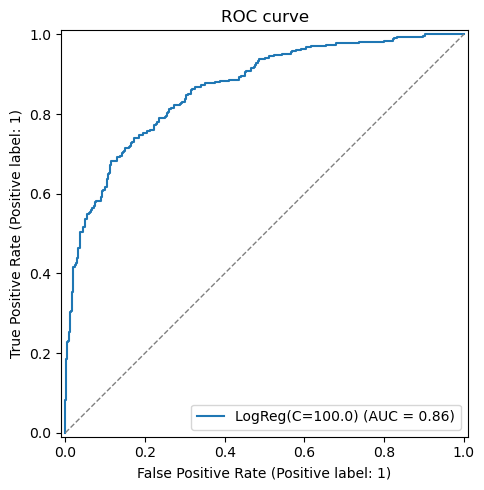

In [47]:
fig_dir = NOTEBOOK_DIR / "figures"
fig_dir.mkdir(parents=True, exist_ok=True)

fig, ax = plt.subplots(figsize=(6, 5))

RocCurveDisplay.from_predictions(y_test, y_proba, ax=ax, name=f"LogReg(C={best_C})")
ax.plot([0, 1], [0, 1], "--", color="gray", linewidth=1)
ax.set_title("ROC curve")

out_path = fig_dir / "roc_curve_logreg.png"
fig.tight_layout()
fig.savefig(out_path, dpi=150)
out_path

In [49]:
final_rows = [
    res_dummy_mf,
    res_dummy_str,
    {"model": f"LogReg(best C={best_C})", "accuracy": acc, "roc_auc": auc},
]

final_df = pd.DataFrame(final_rows).sort_values("roc_auc", ascending=False)
final_df

,model,accuracy,roc_auc
2,LogReg(best C=100.0),0.793333,0.864731
1,Dummy(stratified),0.540000,0.524586
0,Dummy(most_frequent),0.589333,0.500000


DummyClassifier(most_frequent) показывает accuracy около 0.58, но ROC-AUC около 0.5, что ожидаемо, так как модель по сути игнорирует признаки.
Dummy(stratified) даёт ROC-AUC около 0.54 (случайное угадывание), что служит хорошей точкой отсчёта.
Логистическая регрессия с масштабированием улучшает качество: accuracy 0.79, ROC-AUC 0.86.
По ROC-AUC логистическая регрессия заметно лучше бейзлайна, значит в признаках действительно есть сигнал.
Для дальнейшего улучшения можно попробовать: подбор порога по PR/recall, калибровку вероятностей, или добавить другую модель.